# Lidar Data Plot Test
Plot data obtained from the RPlidar S1. This is a simple test to figure out how to show the data before doing so in Cpp.

In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataclasses

In [ ]:
# Load data
data = pd.read_csv("lidar_data.csv")

In [ ]:
# Showing data table
data

,Angle,Distance,Quality
0,359.874000,3.356,188
1,0.214233,3.359,188
2,0.576782,3.359,188
3,0.917358,3.357,188
4,1.279910,3.355,188
...,...,...,...
1007,358.028000,0.000,0
1008,358.401000,0.000,0
1009,358.781000,0.000,0
1010,359.138000,3.305,188


In [43]:
@dataclasses.dataclass
class Coordinates:
    """
    A simple class to represent a (x,y) coordinate.
    ...

    Attributes
    ----------
    x : float
        x component
    y : float
        y component
    """

    x: float
    y: float

def obtain_coordinates(angle: float, distance: float) -> Coordinates:
    """
    Returns the (x,y) given an angle and distance from the origin.

            Parameters:
                    angle (float): angle in degrees.
                    distance (float): distance in meters.

            Returns:
                    (Coordinates): (x,y) coordinates.
    """
    angle = np.deg2rad(angle)  # numpy trig functions expect radians
    x = distance * np.cos(angle)
    y = distance * np.sin(angle)

    return Coordinates(x, y)

In [ ]:
# Let's obtain a list of angles
coordinates_list = [obtain_coordinates(row[1].Angle, row[1].Distance) for row in data.iterrows() if row[1].Quality > 0]

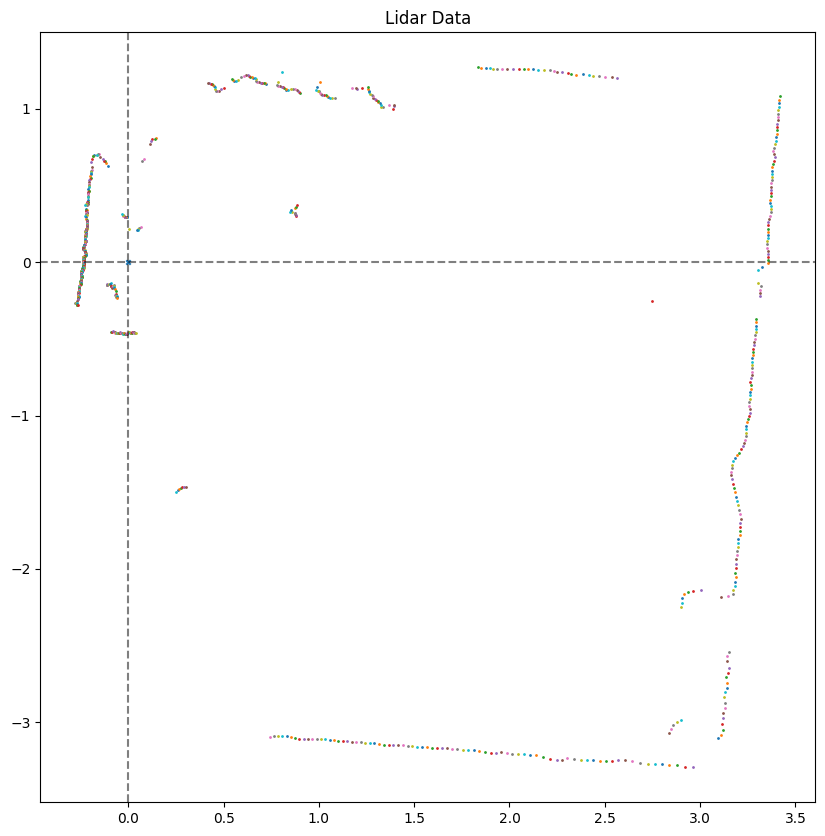

In [42]:
# Let's plot the data
plt.figure(figsize=(10,10))
plt.title("Lidar Data")
plt.axhline(0, color='black', alpha=0.5, linestyle='--')
plt.axvline(0, color='black', alpha=0.5, linestyle='--')

for coordinate in coordinates_list:
    plt.scatter(x=coordinate.x, y=coordinate.y, s=1)